In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [107]:
#read in the data
df = pd.read_csv('./data/topGA.csv')
df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,PK.1,PKatt.1
0,Ryunosuke Sagara,jp JPN,MF,21-257,11,9,762,8.5,4,3,...,4,4,100,0.47,0.47,1,1,NaN,0,0
1,Masato Nakayama,jp JPN,FW,32-084,11,7,542,6.0,3,1,...,3,3,100,0.50,0.50,1,1,NaN,0,0


In [108]:
#drop non-need-colomn
df = df.drop(['Nation','Pos','Age','MP','Starts','90s','Gls','Ast','Matches','G-PK','PK','PKatt','CrdR','Dist', 'Sh', 'SoT', 'G/Sh', 'G/SoT', 'PK.1', 'PKatt.1', 'G-PK.1', 'G+A-PK'],axis=1)
df

,Player,Min,CrdY,Gls.1,Ast.1,G+A,SoT%,Sh/90,SoT/90
0,Ryunosuke Sagara,762,3,0.47,0.35,0.83,100,0.47,0.47
1,Masato Nakayama,542,0,0.50,0.17,0.66,100,0.50,0.50


In [109]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Min', 'CrdY', 'Gls.1', 'Ast.1', 'G+A', 'SoT%', 'Sh/90', 'SoT/90']

In [110]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Ryunosuke Sagara':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Masato Nakayama':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

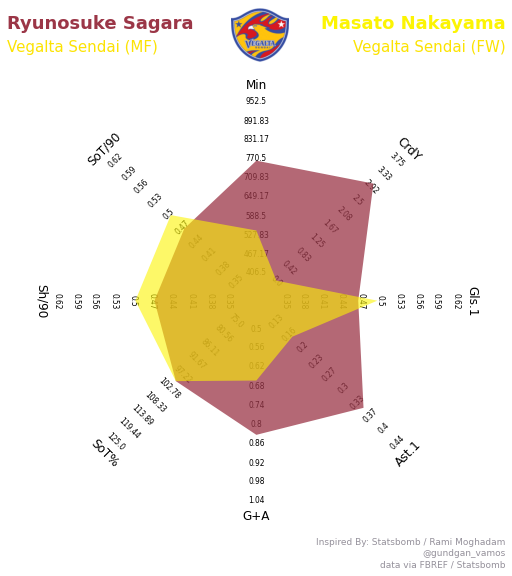

In [114]:
#title 
title = dict(
  title_name='Ryunosuke Sagara',
  title_color='#9B3647',
  subtitle_name="Vegalta Sendai (MF)",
  subtitle_color='#fce303',
  title_name_2='Masato Nakayama',
  title_color_2='#fcf403',
  subtitle_name_2="Vegalta Sendai (FW)",
  subtitle_color_2='#fce303',
  title_fontsize=18,
  subtitle_fontsize=15
)

endnote = '@gundgan_vamos\ndata via FBREF / Statsbomb'

radar = Radar(
  label_fontsize=12,
  range_fontsize=7.5,
  background_color="#ffffff",
  patch_color="#FFFFFF",
  label_color="#000000",
  range_color="#000000"
)

fig,ax = radar.plot_radar(
  ranges=ranges,
  params=params,
  values=values,
  radar_color=['#9B3647', '#fcf403'],
  alphas=[.75,.6],
  title=title,
  image='./logo/vegaltasendai.png',
  image_coord=[0.495, 0.805, 0.04, 0.1],
  compare=True,
  filename="./output/topGA.jpg",
  endnote=endnote,
)